In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("/kaggle/input/credit-card-fraud/card_transdata.csv")

In [3]:
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [4]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
y=df["fraud"]
x=df.drop("fraud",axis=1)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,train_size=0.85)

In [7]:
log=LogisticRegression(solver="liblinear")
model=log.fit(x_train,y_train)

In [8]:
model.score(x_test,y_test)

0.9599066666666667

In [9]:
### DecisionTreeClassifier

In [10]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)

In [11]:
model.score(x_test,y_test)

0.9999733333333334

In [12]:
x_train.shape

(850000, 7)

In [13]:
df["fraud"].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [14]:
### EDA ###

In [15]:
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [16]:
dfgr=df.groupby(by="fraud").mean()

In [17]:
dfgr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


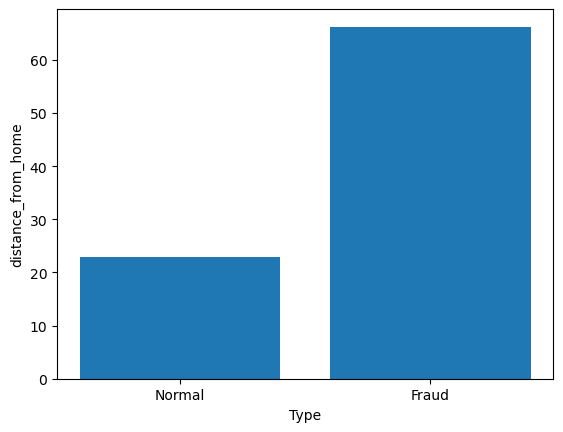

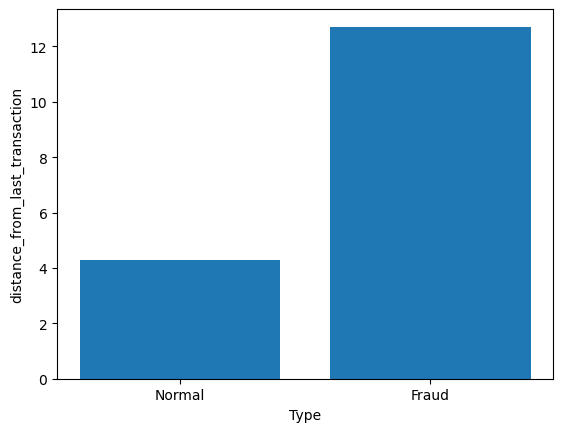

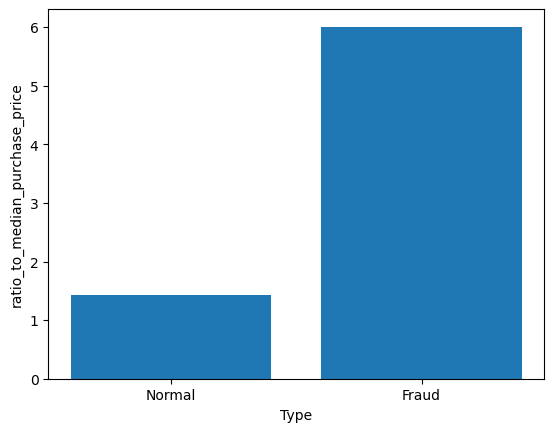

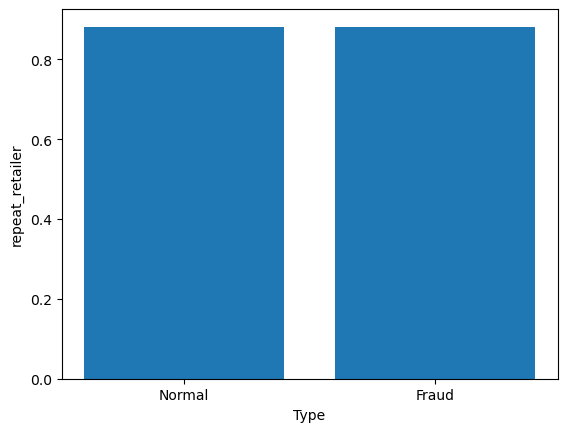

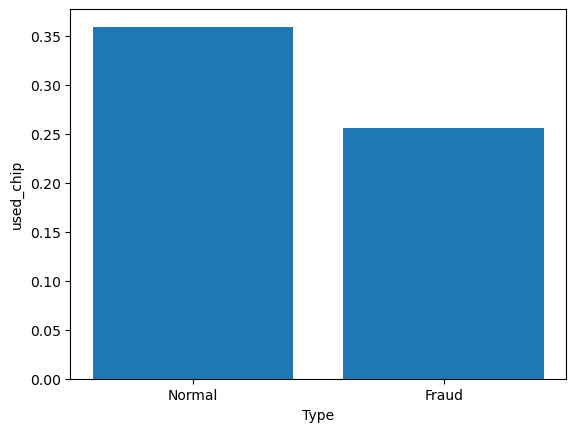

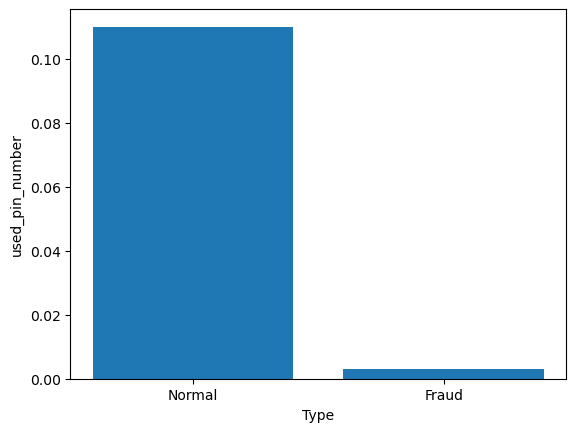

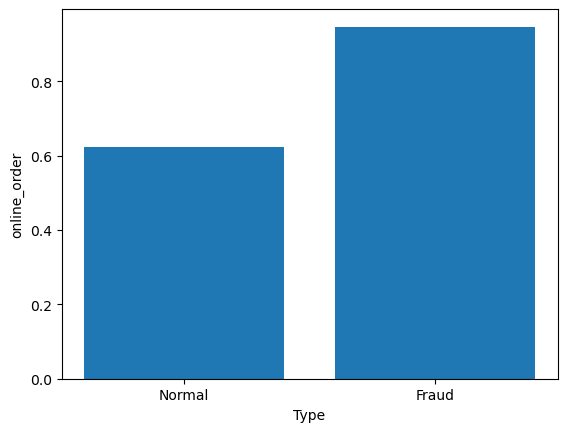

In [18]:
for i in dfgr.columns:
    plt.bar(["Normal","Fraud"],dfgr[i])
    plt.xlabel("Type")
    plt.ylabel(i)
    plt.show()

In [19]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [20]:
fraudc=df["fraud"].value_counts()

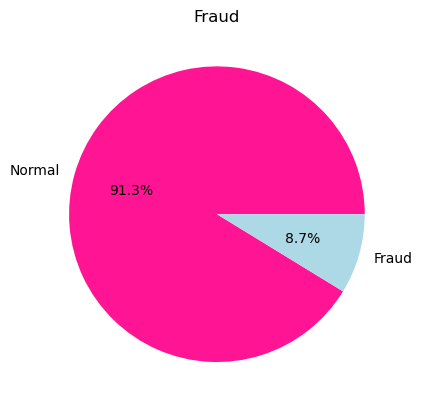

In [21]:
plt.pie(fraudc.values,labels=["Normal","Fraud"],autopct="%1.1f%%",colors=["deeppink","lightblue"])
plt.title("Fraud")
plt.show()

In [22]:
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [23]:
df.corr().style.background_gradient()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [24]:
#İlk kullanımda dolandırıcık olanların tamamına göre karşılaştırılması "çipli ve şifresiz ilk kullanım"

([<matplotlib.patches.Wedge at 0x7add1905c730>,
 [Text(0.602925369116526, 0.920044020292345, 'İlk Kullanım'),
  Text(-0.6029253691165259, -0.920044020292345, 'Diğer')],
 [Text(0.32886838315446876, 0.5018421928867336, '31.5%'),
  Text(-0.3288683831544687, -0.5018421928867336, '68.5%')])

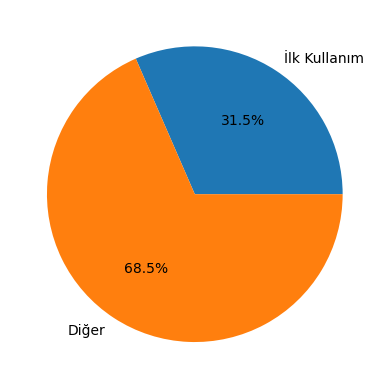

In [25]:
filtre1=df["used_chip"]==1
filtre2=df["used_pin_number"]==0

ilk=df[filtre1 & filtre2 ]

plt.pie([len(ilk),len(df)-len(ilk)],labels=(["İlk Kullanım","Diğer"]),autopct="%1.1f%%")

In [26]:
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [27]:
#Online Olmayan İşlemlerde PIN Kullanma Oranı

In [28]:
online=df[df["online_order"]==0]

online_pin=online["used_pin_number"].value_counts()

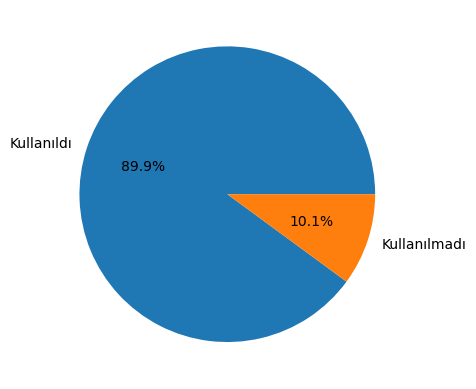

In [29]:
plt.pie(online_pin.values,labels=["Kullanıldı","Kullanılmadı"],autopct="%1.1f%%")
plt.show()